Homework set for chapter 8

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize,minimize_scalar,root_scalar
from scipy.interpolate import CubicSpline,interp1d


In [8]:
gamma, beta, r, w = 0.5, 0.975, 0.02, 1


In [2]:
#8.4

def utility_function(c):
    return c**(1-1/gamma)/(1-1/gamma)

def marginal_utility(c):
    return c ** (-1 / gamma)

#initial guess interpolation
def inter_helper(a_grid,v_grid):
    return interp1d(a_grid,v_grid,kind='cubic',fill_value='extrapolate')

#Bellmans equation
def bellman_equation(value_function,a):
    upper_bound = (1 + r) * a + w
    # If consumption is infeasible (upper_bound <= 0), assign a large negative value
    if upper_bound <= 1e-8:
        return -1e10, 1e-8
    
    def objective(c):
        if c <= 0:
            return 1e10
        next_a = (1+r)*a + w - c
        return - (utility_function(c) + beta * value_function(next_a))
    result = minimize_scalar(objective,bounds=(1e-10,upper_bound),method='bounded')
    return -result.fun, result.x

#Parameters
gamma, beta, r, w = 0.5, 0.975, 0.02, 1

#Value function grid
grid = np.linspace(0,20,500) #grid (a_grid)
initial_guess = np.zeros_like(grid) #initial guess (V)
policy_consumption_function = np.zeros_like(grid) #policy function (policy)

#VFI
convergance_tolerance = 1e-6
max_iterations = 500

for i in range(max_iterations):
    value_function = inter_helper(grid,initial_guess)
    initial_guess_new = np.zeros_like(initial_guess) #dummy array that will get dumped into the original policy function later. will now be used to store the new policy function 
    for j, a in enumerate(grid):
        initial_guess_new[j], policy_consumption_function[j] = bellman_equation(value_function,a)
    if np.max(np.abs(initial_guess - initial_guess_new)) < convergance_tolerance:
        break
    initial_guess = initial_guess_new.copy()

print(f"Converged after {i+1} iterations.")



Converged after 500 iterations.


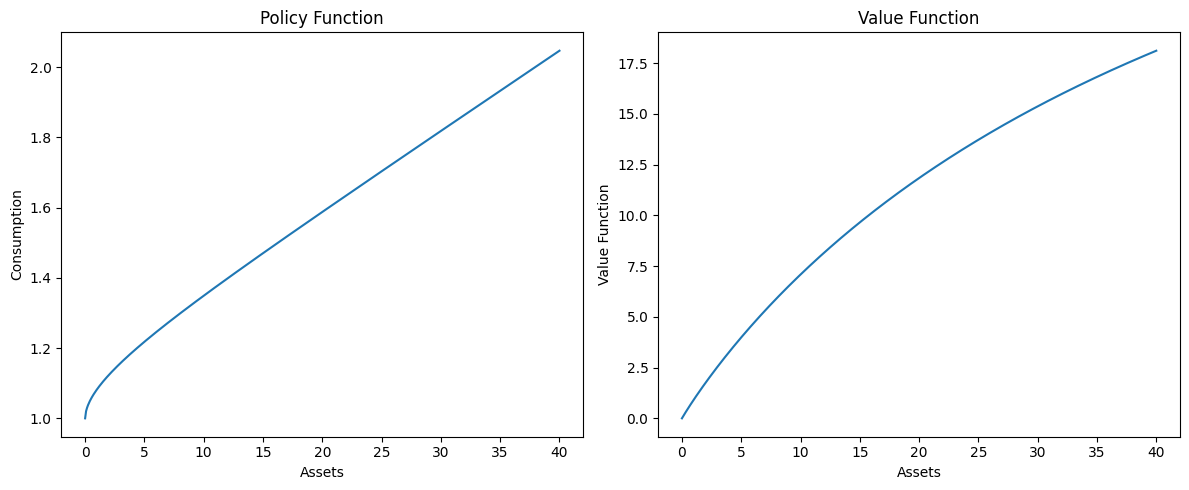

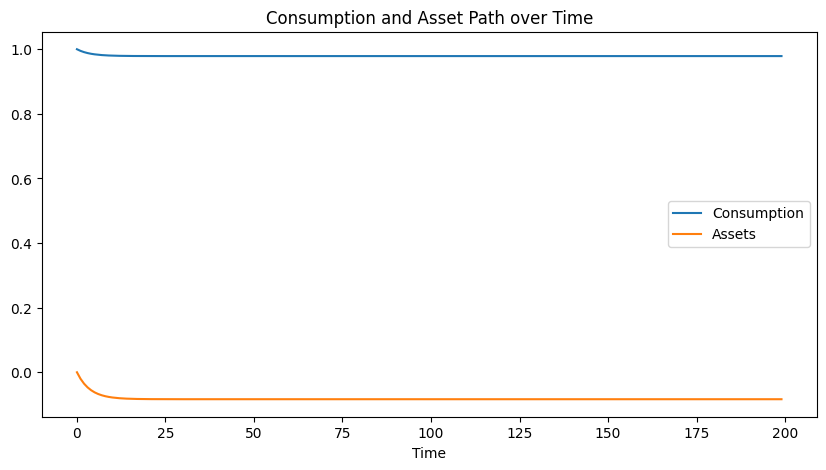

In [3]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(grid, policy_consumption_function)
plt.xlabel('Assets')
plt.ylabel('Consumption')
plt.title('Policy Function')

plt.subplot(1, 2, 2)
plt.plot(grid, initial_guess-np.min(initial_guess))
plt.xlabel('Assets')
plt.ylabel('Value Function')
plt.title('Value Function')

plt.tight_layout()
plt.show()

periods = 200
assets = np.zeros(periods)
consumption_path = np.zeros(periods)

assets[0] = 0  # Starting assets
value_function = inter_helper(grid, initial_guess)
policy_function = interp1d(grid, policy_consumption_function, kind='linear', fill_value='extrapolate')

for t in range(periods):
    consumption_path[t] = policy_function(assets[t])
    if t < periods - 1:
        assets[t + 1] = (1 + r) * (assets[t] - consumption_path[t]) + w

plt.figure(figsize=(10, 5))
plt.plot(consumption_path, label='Consumption')
plt.plot(assets, label='Assets')
plt.xlabel('Time')
plt.legend()
plt.title('Consumption and Asset Path over Time')
plt.show()

In [4]:
# Bellman operator using root-finding (Euler equation)
def euler_bellman(value_function, a):
    upper_bound = (1 + r) * a + w

    # Skip points with infeasible consumption
    if upper_bound <= 0:
        return -1e10, 1e-8

    def euler_residual(c):
        if c <= 0:
            return 1e10
        a_next = (1 + r) * a + w - c
        return marginal_utility(c) - beta * (1 + r) * value_function.derivative()(a_next)
    
    #finding C* 
    try:
        result = root_scalar(euler_residual,bracket=[1e-10,upper_bound],method='brentq')
        optimal_c = result.root
        next_a = (1 + r) * a + w - optimal_c
        optimal_value = utility_function(optimal_c) + beta * value_function(next_a)
        return optimal_c, optimal_value
    except:
        return 1e8, -1e-10
    
#Solving with interpolation
initial_guess = np.zeros_like(grid) #initial guess
policy_function = np.zeros_like(grid) #policy function

for iteration in range(max_iterations):
    value_function = interp1d(grid,initial_guess,fill_value='extrapolate',kind='cubic',assume_sorted=True)
    value_function.derivative = interp1d(grid, np.gradient(initial_guess, grid), fill_value="extrapolate", kind='linear', assume_sorted=True)
    value_function_new = np.zeros_like(initial_guess)
    policy_function_new = np.zeros_like(policy_function)

    for j, a in enumerate(grid):
        policy_function_new[j], value_function_new[j] = euler_bellman(value_function,a)
        if np.max(np.abs(value_function_new - initial_guess)) < convergance_tolerance:
            print(f'Converged after {iteration+1} iterations')
            break   
        else:
            print(f'Iteration {iteration+1} not converged')
    initial_guess = value_function_new.copy()
    policy_function = policy_function_new.copy()


Converged after 1 iterations
Converged after 2 iterations
Converged after 3 iterations
Converged after 4 iterations
Converged after 5 iterations
Converged after 6 iterations
Converged after 7 iterations
Converged after 8 iterations
Converged after 9 iterations
Converged after 10 iterations
Converged after 11 iterations
Converged after 12 iterations
Converged after 13 iterations
Converged after 14 iterations
Converged after 15 iterations
Converged after 16 iterations
Converged after 17 iterations
Converged after 18 iterations
Converged after 19 iterations
Converged after 20 iterations
Converged after 21 iterations
Converged after 22 iterations
Converged after 23 iterations
Converged after 24 iterations
Converged after 25 iterations
Converged after 26 iterations
Converged after 27 iterations
Converged after 28 iterations
Converged after 29 iterations
Converged after 30 iterations
Converged after 31 iterations
Converged after 32 iterations
Converged after 33 iterations
Converged after 34 

Converged after 2 iterations


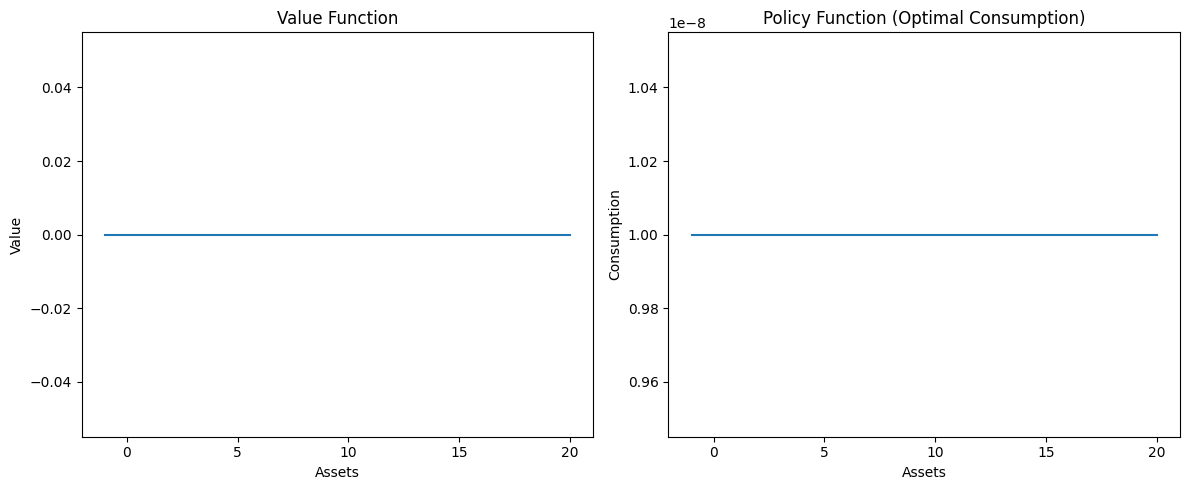

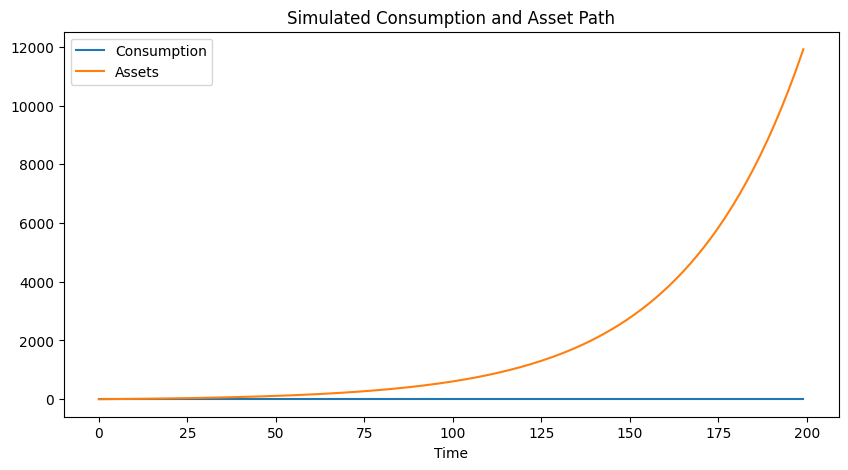

In [ ]:
a_grid = np.linspace(-1, 20, 500)  # Asset grid
max_iter = 500
tol = 1e-6

# Utility function (CRRA)
def utility(c):
    if c <= 0:
        return -1e10
    return c**(1 - 1/gamma) / (1 - 1/gamma)

# Marginal utility
def marginal_utility(c):
    return c ** (-1 / gamma)

# Bellman operator using root-finding (Euler equation)
def bellman(V_func, a):
    upper_bound = (1 + r) * a + w

    # Skip points with infeasible consumption
    if upper_bound <= 0:
        return -1e10, 1e-8

    def euler_residual(c):
        if c <= 0:
            return 1e10
        a_next = (1 + r) * a + w - c
        return marginal_utility(c) - beta * (1 + r) * V_func.derivative()(a_next)

    # Find c* such that euler_residual(c*) = 0
    try:
        res = root_scalar(euler_residual, bracket=[1e-8, upper_bound], method='brentq')
        c_star = res.root
        a_next = (1 + r) * a + w - c_star
        V_star = utility(c_star) + beta * V_func(a_next)
        return V_star, c_star
    except:
        return -1e10, 1e-8  # If root finding fails, penalize this choice

# Value function iteration with interpolation
V = np.zeros_like(a_grid)
policy = np.zeros_like(a_grid)

for iteration in range(max_iter):
    V_func = interp1d(a_grid, V, fill_value="extrapolate", kind='cubic', assume_sorted=True)
    V_func.derivative = lambda: interp1d(a_grid, np.gradient(V, a_grid), fill_value="extrapolate", kind='linear', assume_sorted=True)
    
    V_new = np.zeros_like(V)
    policy_new = np.zeros_like(policy)

    for j, a in enumerate(a_grid):
        V_new[j], policy_new[j] = bellman(V_func, a)

    if np.max(np.abs(V_new - V)) < tol:
        print(f'Converged after {iteration+1} iterations')
        break

    V = V_new
    policy = policy_new

# Plot Value Function and Policy Function
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(a_grid, V-np.min(V))
plt.title('Value Function')
plt.xlabel('Assets')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.plot(a_grid, policy)
plt.title('Policy Function (Optimal Consumption)')
plt.xlabel('Assets')
plt.ylabel('Consumption')
plt.tight_layout()
plt.show()

# Simulate Consumption Path
T = 200
a_sim = np.zeros(T)
c_sim = np.zeros(T)

a_sim[0] = 0  # Starting with zero assets

policy_func = interp1d(a_grid, policy, fill_value="extrapolate", kind='cubic')

for t in range(T):
    c_sim[t] = policy_func(a_sim[t])
    a_next = (1 + r) * a_sim[t] + w - c_sim[t]
    if t < T - 1:
        a_sim[t+1] = a_next

plt.figure(figsize=(10, 5))
plt.plot(c_sim, label='Consumption')
plt.plot(a_sim, label='Assets')
plt.title('Simulated Consumption and Asset Path')
plt.xlabel('Time')
plt.legend()
plt.show()

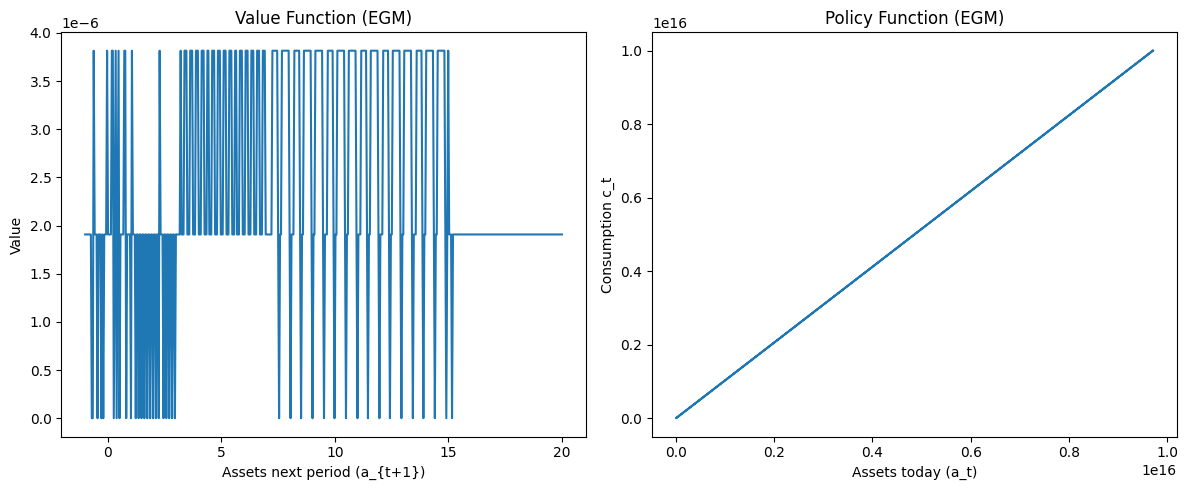

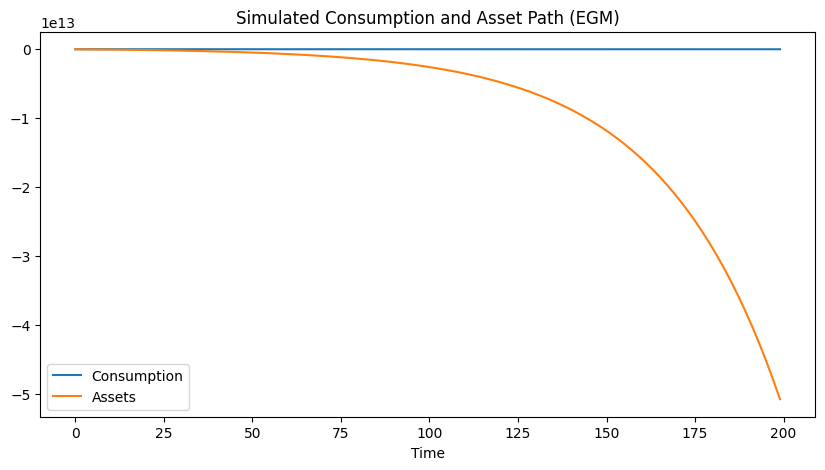

In [32]:
def inverse_marginal_utility(u_prime):
    return np.maximum(u_prime, 1e-8) ** (-1 / gamma)

next_grid = np.linspace(-1, 20, 500)  # Grid for next-period assets (endogenous grid)
initial_guess = ((1 + r) * next_grid + w) ** (1 - 1/gamma) / (1 - 1/gamma)

for iteration in range(max_iter):
    # Compute marginal value at next period's assets
    V_interp = interp1d(next_grid, V, fill_value="extrapolate", kind='cubic', assume_sorted=True)
    V_prime = np.gradient(V, next_grid)
    V_prime_interp = interp1d(next_grid, V_prime, fill_value="extrapolate", kind='linear', assume_sorted=True)

    consumption = inverse_marginal_utility(beta * (1 + r) * V_prime_interp(next_grid))

    current_assets = (consumption + next_grid - w) / (1 + r)

    mask = np.isfinite(current_assets) & np.isfinite(consumption)
    current_assets = current_assets[mask]
    consumption = consumption[mask]

    # Sort by current_assets
    sorted_indices = np.argsort(current_assets)
    current_assets_sorted = current_assets[sorted_indices]
    consumption_sorted = consumption[sorted_indices]

    # Remove duplicates
    current_assets_unique, unique_indices = np.unique(current_assets_sorted, return_index=True)
    consumption_unique = consumption_sorted[unique_indices]

    # Check for remaining invalids or too-small spacings (optional)
    min_spacing = np.min(np.diff(current_assets_unique))
    if min_spacing < 1e-8:
        print("Warning: Very close points in current_assets_unique, may cause instability.")

    # Use in interpolation
    policy_func = interp1d(current_assets_unique, consumption_unique, fill_value="extrapolate", kind='linear', assume_sorted=True)
    consumption_grid = policy_func(next_grid)
    V_new = consumption_grid ** (1 - 1/gamma) / (1 - 1/gamma) + beta * V_interp(next_grid)

    if np.max(np.abs(V_new - V)) < tol:
        print(f"Converged after {iteration+1} iterations")
        break
    initial_guess = V_new

# Plot policy function and value function
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(next_grid, initial_guess - np.min(initial_guess))
plt.title("Value Function (EGM)")
plt.xlabel("Assets next period (a_{t+1})")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.plot(current_assets, consumption)
plt.title("Policy Function (EGM)")
plt.xlabel("Assets today (a_t)")
plt.ylabel("Consumption c_t")
plt.tight_layout()
plt.show()

# Simulate Consumption and Asset Path
periods = 200
a_sim = np.zeros(periods)
c_sim = np.zeros(periods)

a_sim[0] = 0  # Start with zero assets
policy_func_full = interp1d(current_assets_unique, consumption_unique, fill_value="extrapolate", kind='linear', assume_sorted=True)

for period in range(periods-1):
    c_sim[period] = policy_func_full(a_sim[period])
    a_next = (1 + r) * a_sim[period] + w - c_sim[period]
    if period < periods - 1:
        a_sim[period + 1] = a_next

plt.figure(figsize=(10, 5))
plt.plot(c_sim, label="Consumption")
plt.plot(a_sim, label="Assets")
plt.title("Simulated Consumption and Asset Path (EGM)")
plt.xlabel("Time")
plt.legend()
plt.show()

In [28]:
current_assets_unique

array([], dtype=float64)